# Data Science Project 
## Does Optimism affect Employability
Below we performed three seperate tests to examine the relation of optimism to other interesting variables namely: gender, employability, and leadership positions

### Data Cleaning

In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
general_data =pd.read_csv('Harambee/teaching_training_data.csv')
opt_scores =pd.read_csv('Harambee/teaching_training_data_opt.csv', index_col=0)
general_data1 = general_data.merge(opt_scores,on='unid')
columns_to_drop = ['Unnamed: 0','company_size','province','survey_date_month', 'job_start_date', 'job_leave_date','givemoney_yes']
cleandata=general_data1.drop(columns_to_drop,axis=1)
cleanerdata=cleandata.dropna(subset=['opt_score'])
duplicate_rows = cleanerdata[cleanerdata.duplicated()]
cleanestdata=cleanerdata.drop_duplicates(subset=['unid'], keep='last', inplace=False)
newcleanestdata=cleanestdata
newcleanestdata.loc[newcleanestdata['opt_score']<0,'opt_score']=0

### Correrlations between Gender and Optimism

In [4]:
#Optimism scores for each gender

optimism_scores = newcleanestdata[newcleanestdata.opt_score.notnull()]

optimism_scores_men = optimism_scores[optimism_scores.gender=='Male'].opt_score
optimism_scores_women = optimism_scores[optimism_scores.gender=='Female'].opt_score
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
#Running test to see if female average score is larger than male average usage to a point that it is statistically significant

tstat, pvalue, ddof = ttest_ind(
                                optimism_scores_women,
                                optimism_scores_men,
                                alternative="larger", #1 sided test
                                usevar="pooled"
)
print("ddof: ",ddof)
print("tstat: ",tstat)
print("pvalue: ", pvalue)

ddof:  30853.0
tstat:  4.622099230308913
pvalue:  1.9070640127442703e-06


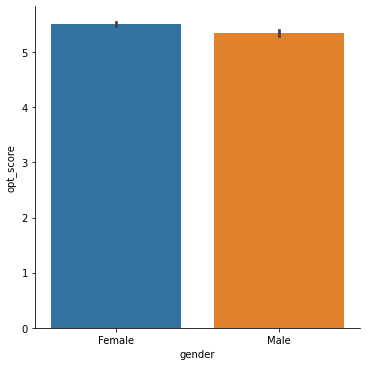

In [6]:
sns.catplot(x="gender", y="opt_score", data=newcleanestdata, kind="bar")

In [7]:
optimism_scores_women.describe()

count    19466.000000
mean         5.511353
std          2.990317
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: opt_score, dtype: float64

In [8]:
optimism_scores_men.describe()

count    11389.000000
mean         5.348319
std          2.989227
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         17.000000
Name: opt_score, dtype: float64

### Conclusions about Gender: 
Originally, we thought no trend existed but after removing the negative values(and treating them as pessimism) we discovered that Women were more optimistic

### Correrlations between Employability and Optimism

In [10]:
#Optimism scores for people who are working and those who are not

optimism_scores_working = optimism_scores[optimism_scores.working==True].opt_score
optimism_scores_notworking = optimism_scores[optimism_scores.working==False].opt_score
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
#Running test to see if female average score is larger than male average usage to a point that it is statistically significant

tstat, pvalue, ddof = ttest_ind(
                                optimism_scores_working,
                                optimism_scores_notworking,
                                alternative="larger", #1 sided test
                                usevar="pooled"
)
print("ddof: ",ddof)
print("tstat: ",tstat)
print("pvalue: ", pvalue)

ddof:  30853.0
tstat:  -1.8356794001373649
pvalue:  0.9667926475416337


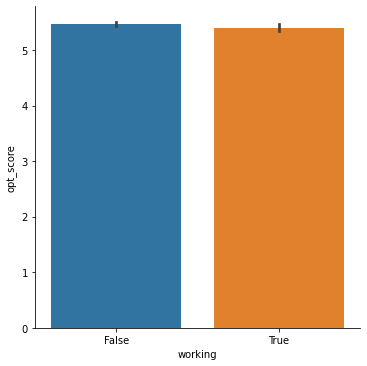

In [11]:
sns.catplot(x="working", y="opt_score", data=newcleanestdata, kind="bar")

In [12]:
optimism_scores_working.describe()

count    7989.000000
mean        5.398298
std         2.943437
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        16.000000
Name: opt_score, dtype: float64

In [13]:
optimism_scores_notworking.describe()

count    22866.000000
mean         5.469649
std          3.007153
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: opt_score, dtype: float64

### Conclusions about Employability and Optimism

Interestingly, we found no trends between employability and optimism, suggesting that people's optimism is independent and has no effect on whether or not they land up in a job

### Correrlations between Leadership and Optimism

In [14]:
newercleanestdata=newcleanestdata.dropna(subset=['leadershiprole'])

#Optimism scores for people who did and who did not participate in leadership roles

optimism_scores = newercleanestdata[newercleanestdata.opt_score.notnull()]

optimism_scores_leader = optimism_scores[optimism_scores.leadershiprole=='Yes'].opt_score
optimism_scores_notleader = optimism_scores[optimism_scores.leadershiprole=='No'].opt_score
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
#Running test to see if female average score is larger than male average usage to a point that it is statistically significant

tstat, pvalue, ddof = ttest_ind(
                                optimism_scores_leader,
                                optimism_scores_notleader,
                                alternative="larger", #1 sided test
                                usevar="pooled"
)
print("ddof: ",ddof)
print("tstat: ",tstat)
print("pvalue: ", pvalue)

ddof:  25597.0
tstat:  5.279056413285643
pvalue:  6.54545157581107e-08


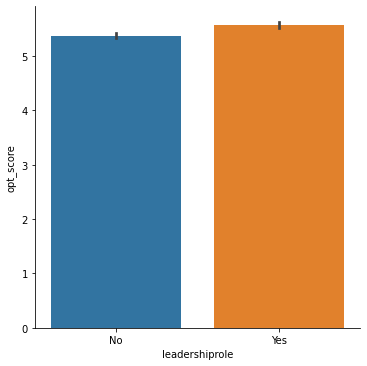

In [15]:
sns.catplot(x="leadershiprole", y="opt_score", data=newercleanestdata, kind="bar")

In [16]:
optimism_scores_leader.describe()

count    9862.000000
mean        5.577469
std         2.989864
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        17.000000
Name: opt_score, dtype: float64

In [18]:
optimism_scores_notleader.describe()

count    15737.000000
mean         5.374595
std          2.993795
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         17.000000
Name: opt_score, dtype: float64

### Conclusions about Leadership and Optimism
Possibly the most significant of our results, we found out that people who work in leadership positions are more optimistic


# Same Data without Removing Negative Values

In [19]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
general_data =pd.read_csv('Harambee/teaching_training_data.csv')
opt_scores =pd.read_csv('Harambee/teaching_training_data_opt.csv', index_col=0)
general_data1 = general_data.merge(opt_scores,on='unid')
columns_to_drop = ['Unnamed: 0','company_size','province','survey_date_month', 'job_start_date', 'job_leave_date','givemoney_yes']
cleandata=general_data1.drop(columns_to_drop,axis=1)
cleanerdata=cleandata.dropna(subset=['opt_score'])
duplicate_rows = cleanerdata[cleanerdata.duplicated()]
cleanestdata=cleanerdata.drop_duplicates(subset=['unid'], keep='last', inplace=False)
newcleanestdata=cleanestdata
#Optimism scores for each gender

optimism_scores = newcleanestdata[newcleanestdata.opt_score.notnull()]

optimism_scores_men = optimism_scores[optimism_scores.gender=='Male'].opt_score
optimism_scores_women = optimism_scores[optimism_scores.gender=='Female'].opt_score
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
#Running test to see if female average score is larger than male average usage to a point that it is statistically significant

tstat, pvalue, ddof = ttest_ind(
                                optimism_scores_women,
                                optimism_scores_men,
                                alternative="larger", #1 sided test
                                usevar="pooled"
)
print("gender ddof: ",ddof)
print("gender tstat: ",tstat)
print("gender pvalue: ", pvalue)
#Optimism scores for people who are working and those who are not

optimism_scores_working = optimism_scores[optimism_scores.working==True].opt_score
optimism_scores_notworking = optimism_scores[optimism_scores.working==False].opt_score
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
#Running test to see if female average score is larger than male average usage to a point that it is statistically significant

tstat, pvalue, ddof = ttest_ind(
                                optimism_scores_working,
                                optimism_scores_notworking,
                                alternative="larger", #1 sided test
                                usevar="pooled"
)
print("working ddof: ",ddof)
print("working tstat: ",tstat)
print("working pvalue: ", pvalue)
newercleanestdata=newcleanestdata.dropna(subset=['leadershiprole'])

#Optimism scores for people who did and who did not participate in leadership roles

optimism_scores = newercleanestdata[newercleanestdata.opt_score.notnull()]

optimism_scores_leader = optimism_scores[optimism_scores.leadershiprole=='Yes'].opt_score
optimism_scores_notleader = optimism_scores[optimism_scores.leadershiprole=='No'].opt_score
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
#Running test to see if female average score is larger than male average usage to a point that it is statistically significant

tstat, pvalue, ddof = ttest_ind(
                                optimism_scores_leader,
                                optimism_scores_notleader,
                                alternative="larger", #1 sided test
                                usevar="pooled"
)
print("leadership ddof: ",ddof)
print("leadership tstat: ",tstat)
print("leadership pvalue: ", pvalue)

gender ddof:  30853.0
gender tstat:  4.7048585315459945
gender pvalue:  1.2757108768487782e-06
working ddof:  30853.0
working tstat:  -1.4238536416666352
working pvalue:  0.9227505216492622
leadership ddof:  25597.0
leadership tstat:  5.346848389384576
leadership pvalue:  4.513267788456752e-08
